In [1]:
import networkx as nx 

In [4]:
BEIJING, CHANGCHUN, MULUMUQI, WUHAN, GUNAGHZOU, SHENZHEN, BANGKOK, SHANGHAI, NEWYORK = """
BEIJING CHANGCHUN MULUMUQI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWYORK
""".split()

In [5]:
dict = {}
connection = {
    CHANGCHUN: [BEIJING],
    MULUMUQI: [BEIJING],
    BEIJING: [MULUMUQI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    NEWYORK: [BEIJING, SHANGHAI],
    SHANGHAI: [NEWYORK, WUHAN],
    WUHAN: [SHANGHAI, BEIJING, GUNAGHZOU],
    GUNAGHZOU: [WUHAN, BANGKOK],
    SHENZHEN: [WUHAN, BANGKOK],
    BANGKOK: [SHENZHEN, GUNAGHZOU]
}

In [7]:
nx.Graph(connection)

In [8]:
g = nx.Graph(connection)

In [11]:
pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/2e/81/bb51214944e79f9c9261badd7ef99b573fb0bc9110c0075c6a9e76224d0d/matplotlib-3.0.3-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/68/f2/21ec13269a420c063a3d7d8c87dac030da7b00fc6b27fa88cfb1c72a645b/kiwisolver-1.0.1-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/de/0a/001be530836743d8be6c2d85069f46fecf84ac6c18c7f5fb8125ee11d854/pyparsing-2.3.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a6/6f/cb20ccd8f0f8581e0e090775c0e3c3e335b037818416e6fa945d924397d2/numpy-1.16.2-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1b

In [13]:
%matplotlib inline

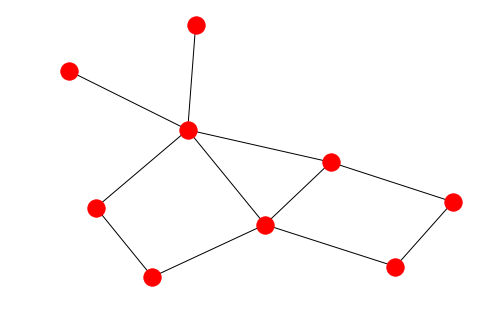

In [14]:
nx.draw(g)

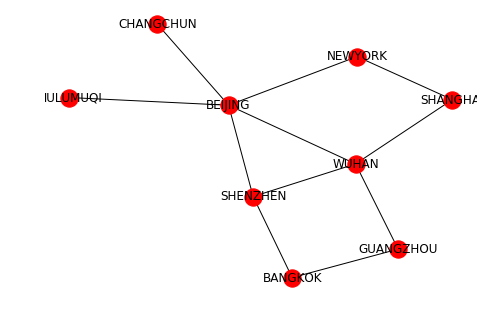

In [16]:
nx.draw(g, with_labels=True)

### 找到两个城市之间的一条路径

In [40]:
def navigate(start, dest, graph):
    pathes = [[start]] # 其中的每一个元素代表一种遍历过程中的一条路径
    seen = set() # 防止死循环
    
    while pathes:
        path = pathes.pop(0) # 每次取最前面的路径，实际就是 BFS
        froniter = path[-1] # 最后一个代表上一次遍历的最后一个点
        
        if froniter in seen: continue
            
        successors = graph[froniter]
        
        for point in successors:
            if point == dest:
                # 找到一个结果
                path.append(point)
                return path
            else:
                pathes.append(path + [point])
            
        seen.add(froniter)
            

In [42]:
navigate(CHANGCHUN, BANGKOK, connection)

['CHANGCHUN', 'BEIJING', 'SHENZHEN', 'BANGKOK']

In [45]:
navigate(CHANGCHUN, SHANGHAI, connection)

['CHANGCHUN', 'BEIJING', 'WUHAN', 'SHANGHAI']

### BFS AND DFS 

In [56]:
def navigate_bfs(start, dest, connection):
    pathes = [start]
    seen = set()
    target_path = []
    
    while pathes:
        # print(pathes)
        froniter = pathes.pop(0)
         
        if froniter in seen: continue
        
        successors = connection[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        pathes = pathes + successors # BFS 的关键点，在于先放入的 point 先搜索
        
        seen.add(froniter)

In [58]:
navigate_bfs(CHANGCHUN, SHANGHAI, connection)

standing on CHANGCHUN Looking forward ['BEIJING']
standing on BEIJING Looking forward ['MULUMUQI', 'CHANGCHUN', 'WUHAN', 'SHENZHEN', 'NEWYORK']
standing on MULUMUQI Looking forward ['BEIJING']
standing on WUHAN Looking forward ['SHANGHAI', 'BEIJING', 'GUANGZHOU']
standing on SHENZHEN Looking forward ['WUHAN', 'BANGKOK']
standing on NEWYORK Looking forward ['BEIJING', 'SHANGHAI']
standing on SHANGHAI Looking forward ['NEWYORK', 'WUHAN']
standing on GUANGZHOU Looking forward ['WUHAN', 'BANGKOK']
standing on BANGKOK Looking forward ['SHENZHEN', 'GUANGZHOU']


In [59]:
def navigate_dfs(start, dest, connection):
    pathes = [start]
    seen = set()
    target_path = []
    
    while pathes:
        # print(pathes)
        froniter = pathes.pop(0)
         
        if froniter in seen: continue
        
        successors = connection[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        # pathes = pathes + successors # BFS 的关键点，在于先放入的 point 先搜索
        pathes = successors + pathes # DFS 的关键点，在于将当前路径的优先继续遍历
        
        seen.add(froniter)

In [60]:
navigate_dfs(CHANGCHUN, SHANGHAI, connection)

standing on CHANGCHUN Looking forward ['BEIJING']
standing on BEIJING Looking forward ['MULUMUQI', 'CHANGCHUN', 'WUHAN', 'SHENZHEN', 'NEWYORK']
standing on MULUMUQI Looking forward ['BEIJING']
standing on WUHAN Looking forward ['SHANGHAI', 'BEIJING', 'GUANGZHOU']
standing on SHANGHAI Looking forward ['NEWYORK', 'WUHAN']
standing on NEWYORK Looking forward ['BEIJING', 'SHANGHAI']
standing on GUANGZHOU Looking forward ['WUHAN', 'BANGKOK']
standing on BANGKOK Looking forward ['SHENZHEN', 'GUANGZHOU']
standing on SHENZHEN Looking forward ['WUHAN', 'BANGKOK']
